# DAV 6150 Module 11 Assignment - Decision Trees & Random Forests
Brian Livian, Alejandra Zapata, Ke Chen

## 1. Introduction 
The data set regarding physical characteristics of mushrooms from https://archive.ics.uci.edu/ml/datasets/mushroom will be used to 

In [136]:
# import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings

warnings.filterwarnings('ignore')

# read data as data frame
clm=["poison-edible",'cap-shape','cap-surface', 
     'cap-color', 'bruises', 'odor', 'gill-attachment','gill-spacing', 
     'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
     'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 
     'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population','habitat']
df=pd.read_csv(r'https://raw.githubusercontent.com/chenkecoco1/DAV-6150/main/M11_Data.csv', names=clm,index_col=None)
# check result
df.head()

,poison-edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


## 2. Exploratory Data Analysis
According to the introduction of the data set source https://archive.ics.uci.edu/ml/datasets/mushroom, the meanings of all variables can be described as below.
- 1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- 2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- 3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
- 4. bruises?: bruises=t,no=f
- 5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
- 6. gill-attachment: attached=a,descending=d,free=f,notched=n
- 7. gill-spacing: close=c,crowded=w,distant=d
- 8. gill-size: broad=b,narrow=n
- 9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
- 10. stalk-shape: enlarging=e,tapering=t
- 11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
- 12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- 13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- 14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
- 15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
- 16. veil-type: partial=p,universal=u
- 17. veil-color: brown=n,orange=o,white=w,yellow=y
- 18. ring-number: none=n,one=o,two=t
- 19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
- 20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
- 21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
- 22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

So we can conclude all the data are nominal catergorical variables. The veil-color will be the response variable, while the others will be used as explananary variables candidates.

In [137]:
# general info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poison-edible             8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

The basic information of the data set shows total 8124 observations with no null values.

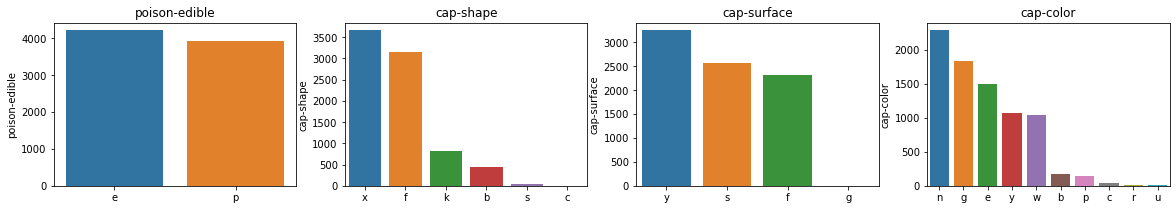

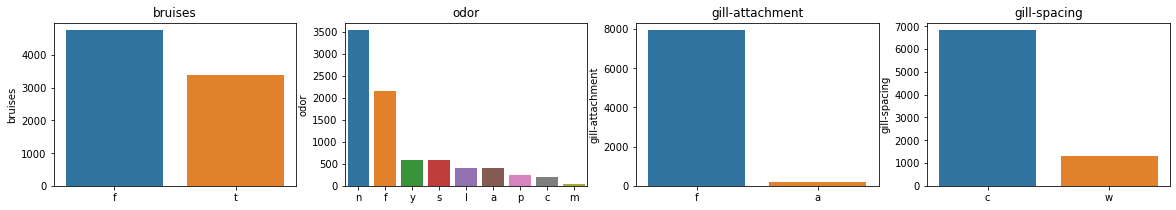

In [138]:
# import library for plotting barplots of all variables
import seaborn as sns

# variables 1-8
figure(figsize=(20, 3))
for i in range(0,4):
    plt.subplot(1, 4, i+1)
    sns.barplot(x = df.iloc[:,i].value_counts().index, y = df.iloc[:,i].value_counts())
    plt.title(df.columns[i])
    
figure(figsize=(20, 3))
for i in range(4,8):
    plt.subplot(1, 4, i-3)
    sns.barplot(x = df.iloc[:,i].value_counts().index, y = df.iloc[:,i].value_counts())
    plt.title(df.columns[i])

In these eight variables, the gill-attachment and gill-spacing shows very imbalanced pattern. Sunken and conical cap-shapes and groove cap-surface has very few observations. Cap-color and odor has more than 5 categories. Some categories has very few observations. So for cap-shape, cap-color and odor, we will reduce categories by combining the categories with fewer observations.

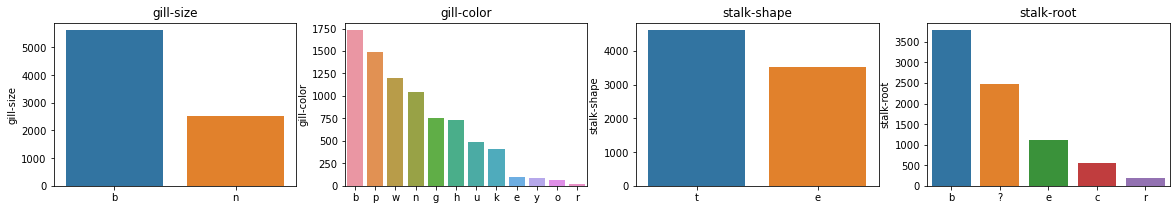

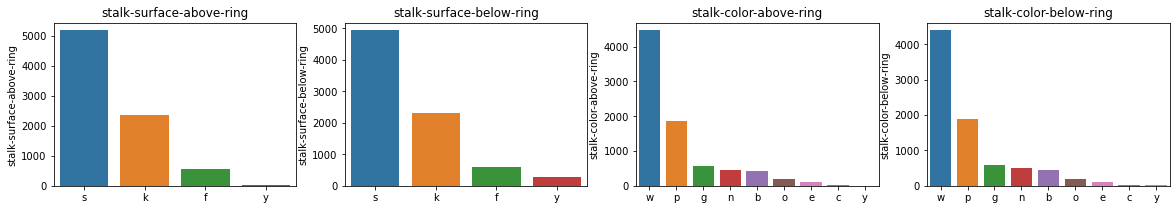

In [139]:
# variables from 9-16
figure(figsize=(20, 3))
for i in range(8,12):
    plt.subplot(1, 4, i-7)
    sns.barplot(x = df.iloc[:,i].value_counts().index, y = df.iloc[:,i].value_counts())
    plt.title(df.columns[i])
    
figure(figsize=(20, 3))
for i in range(12,16):
    plt.subplot(1, 4, i-11)
    sns.barplot(x = df.iloc[:,i].value_counts().index, y = df.iloc[:,i].value_counts())
    plt.title(df.columns[i])

Gill-color has the most categories, with some categories has fewer values. Interestingly, stalk-color-above-ring and stalk-color-below-ring has almost the same pattern, both have many categories but some have very few observations. It is also reasonable to combine them into one category.

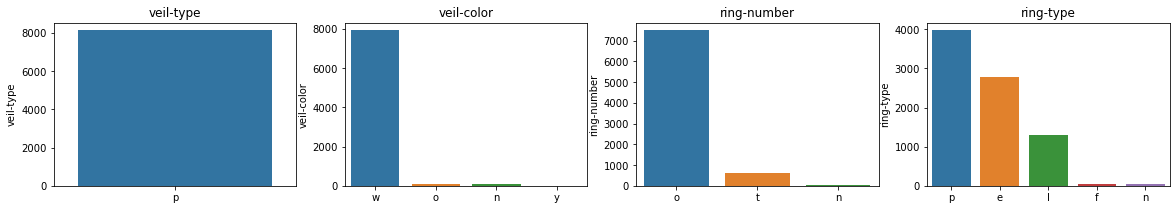

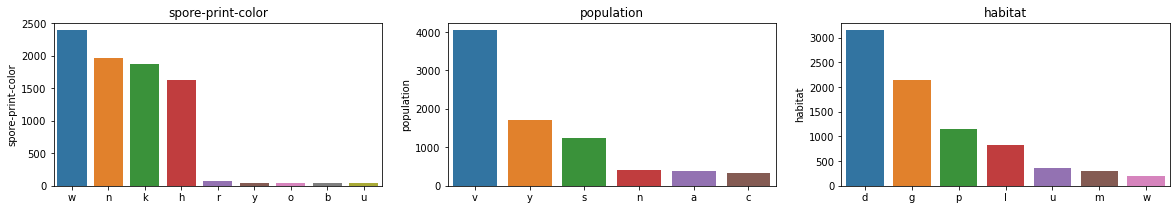

In [140]:
# variables 17-23
figure(figsize=(20, 3))
for i in range(16,20):
    plt.subplot(1, 4, i-15)
    sns.barplot(x = df.iloc[:,i].value_counts().index, y = df.iloc[:,i].value_counts())
    plt.title(df.columns[i])
    
figure(figsize=(20, 3))
for i in range(20,23):
    plt.subplot(1, 3, i-19)
    sns.barplot(x = df.iloc[:,i].value_counts().index, y = df.iloc[:,i].value_counts())
    plt.title(df.columns[i])

Veil-type has only one category, which will not contribute to our modeling. We will drop it. The veil-color is the response variable, but it is very imbalanced. So the model will not be evaluated not by only one metric. The ring-number and ring-type also show some rarely seen categories. Spore-print-color has 5 colors that show fewer observations. They are all candidates for reducing categories.

In [141]:
df_im=df.loc[df['veil-color']!='w']


In [142]:
df_im.head()

,poison-edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6038,e,b,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,n,c,l
6040,e,x,s,n,f,n,a,c,b,o,e,?,s,s,o,o,p,n,o,p,n,v,l
6375,e,b,s,n,f,n,a,c,b,o,e,?,s,s,o,o,p,o,o,p,o,v,l
6424,e,x,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,n,o,p,y,c,l
6434,e,x,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,n,o,p,o,v,l


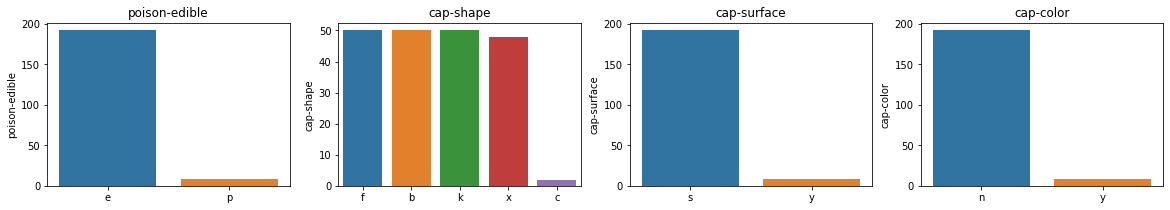

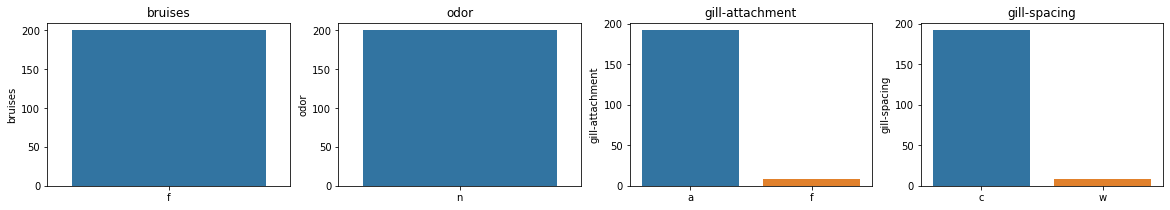

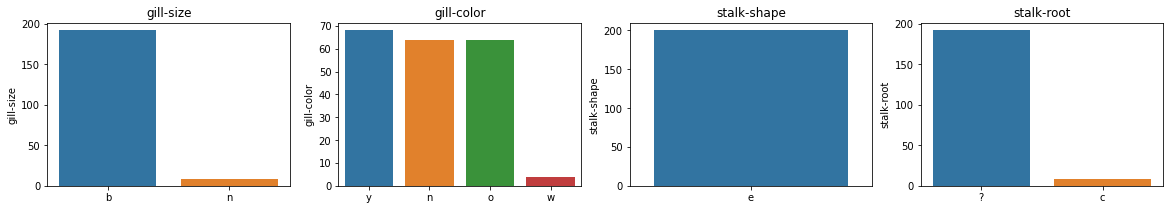

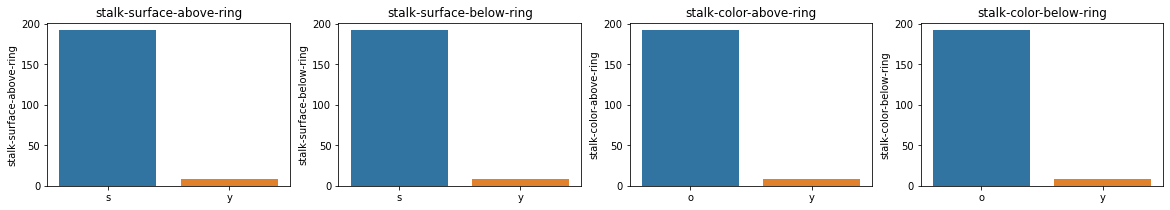

In [143]:
figure(figsize=(20, 3))
for i in range(0,4):
    plt.subplot(1, 4, i+1)
    sns.barplot(x = df_im.iloc[:,i].value_counts().index, y = df_im.iloc[:,i].value_counts())
    plt.title(df.columns[i])
    
figure(figsize=(20, 3))
for i in range(4,8):
    plt.subplot(1, 4, i-3)
    sns.barplot(x = df_im.iloc[:,i].value_counts().index, y = df_im.iloc[:,i].value_counts())
    plt.title(df.columns[i])
    
figure(figsize=(20, 3))
for i in range(8,12):
    plt.subplot(1, 4, i-7)
    sns.barplot(x = df_im.iloc[:,i].value_counts().index, y = df_im.iloc[:,i].value_counts())
    plt.title(df.columns[i])
    
figure(figsize=(20, 3))
for i in range(12,16):
    plt.subplot(1, 4, i-11)
    sns.barplot(x = df_im.iloc[:,i].value_counts().index, y = df_im.iloc[:,i].value_counts())
    plt.title(df.columns[i])



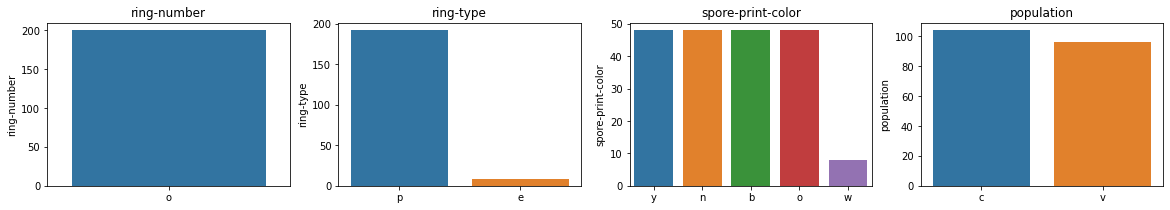

In [144]:
figure(figsize=(20, 3))
for i in range(18,22):
    plt.subplot(1, 4, i-17)
    sns.barplot(x = df_im.iloc[:,i].value_counts().index, y = df_im.iloc[:,i].value_counts())
    plt.title(df.columns[i])


Text(0.5, 1.0, 'habitat')

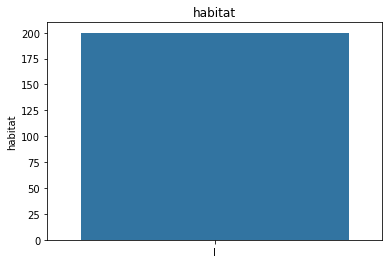

In [145]:
sns.barplot(x = df_im.iloc[:,-1].value_counts().index, y = df_im.iloc[:,-1].value_counts())
plt.title(df.columns[-1])

for col in df.columns:
    pd.crosstab(df[col], df['veil-color']).apply(lambda r: r/r.sum(), axis=1).plot.bar(stacked = True, color = ['tab:brown', 'tab:orange', 'xkcd:eggshell', 'y'])

## 3. Data Preparation
### Delete columns

In [106]:
# For simplify our running code, we will reload the data again 
df=pd.read_csv(r'https://raw.githubusercontent.com/chenkecoco1/DAV-6150/main/M11_Data.csv', names=clm,index_col=None)
# drop the useless columns
df=df.drop(['veil-type','ring-number','odor',],axis=1)

### Split the independent variables and dependent variable

In [107]:
# dependent variable
df_response=df[['veil-color']]
df_independent=df.copy().drop(['veil-color'],axis=1)

### Scale all categorical variables

In [103]:
# hot encode the independent variables
df_independent=pd.get_dummies(df_independent, prefix=None)

In [104]:
# drop duplicate info columns
df_independent_dk=df_independent.drop(['poison-edible_p','bruises_t','gill-attachment_a','gill-spacing_w','gill-size_n','stalk-shape_e'],axis=1)


In [105]:
# sanity check
df_new=pd.concat([df_response,df_independent_dk],axis=1)
pd.set_option('display.max_columns', 100)
df_new.head()

,veil-color,poison-edible_e,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_c,gill-size_b,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_?,stalk-root_b,...,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,w,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,w,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,w,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,w,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,w,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


## 4. Feature Selection

Select features based on the crosstab analysis between all the explanatory variables and Veil Color. Based on the analysis, gill-attachment, gill-color, stalk-color-above-ring, stalk-color-below-ring, and spore-print-color cause variation in the response variables, veil-color. We will use these attributes to train the model.

# delete missing values
df=pd.read_csv(r'https://raw.githubusercontent.com/chenkecoco1/DAV-6150/main/M11_Data.csv', names=clm,index_col=None)
df=df.drop(['veil-type'],axis=1)
df_response=df[['veil-color']]
df_independent=df.copy()
df_independent=df_independent.drop(['veil-color'],axis=1)
df_independent = df_independent[['gill-attachment', 'gill-color', 'stalk-color-above-ring', 'stalk-color-below-ring', 'spore-print-color']]
df_independent_dk=pd.get_dummies(df_independent, prefix=None).drop(['gill-attachment_a'],axis=1)
df_new=pd.concat([df_response,df_independent_dk],axis=1)
pd.set_option('display.max_columns', 100)
df_new.head()

In [70]:
# delete missing values
df=pd.read_csv(r'https://raw.githubusercontent.com/chenkecoco1/DAV-6150/main/M11_Data.csv', names=clm,index_col=None)
df=df.drop(['veil-type'],axis=1)
df_response=df[['veil-color']]
df_independent=df.copy()
df_independent=df_independent.drop(['veil-color'],axis=1)
df_independent = df_independent[['gill-attachment']]
df_independent_dk=pd.get_dummies(df_independent, prefix=None)#.drop(['gill-attachment_a'],axis=1)
df_new=pd.concat([df_response,df_independent_dk],axis=1)
pd.set_option('display.max_columns', 100)
df_new.head()

#,  'stalk-color-below-ring'

,veil-color,gill-attachment_a,gill-attachment_f
0,w,0,1
1,w,0,1
2,w,0,1
3,w,0,1
4,w,0,1


## 5. Decision Tree + Random Forest Modeling

In [71]:
from sklearn.model_selection import train_test_split
# set the explanatory variables and response variable
X = df_independent_dk 
y = df_new['veil-color']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 47, test_size = 0.25)
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [72]:
y_pred =  clf.predict(X_test)

In [73]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

print('f1 Score on train data: ', f1_score(y_true=y_train, y_pred=clf.predict(X_train), average='micro'))
print('f1 Score on test data: ', f1_score(y_true=y_test, y_pred=y_pred, average='micro'))

print('Recall Score on train data: ', recall_score(y_true=y_train, y_pred=clf.predict(X_train), average='micro'))
print('Recall Score on test data: ', recall_score(y_true=y_test, y_pred=y_pred, average='micro'))

print('Precision Score on train data: ', precision_score(y_true=y_train, y_pred=clf.predict(X_train), average='micro'))
print('Precision Score on test data: ', precision_score(y_true=y_test, y_pred=y_pred, average='micro'))

Accuracy Score on train data:  0.9868701788938126
Accuracy Score on test data:  0.9793205317577548
f1 Score on train data:  0.9868701788938126
f1 Score on test data:  0.9793205317577548
Recall Score on train data:  0.9868701788938126
Recall Score on test data:  0.9793205317577548
Precision Score on train data:  0.9868701788938126
Precision Score on test data:  0.9793205317577548


In [56]:
from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)




RandomForestClassifier(random_state=0)

In [57]:


# Predict the Test set results

y_pred = rfc.predict(X_test)

In [58]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=rfc.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

print('f1 Score on train data: ', f1_score(y_true=y_train, y_pred=rfc.predict(X_train), average='micro'))
print('f1 Score on test data: ', f1_score(y_true=y_test, y_pred=y_pred, average='micro'))

print('Recall Score on train data: ', recall_score(y_true=y_train, y_pred=rfc.predict(X_train), average='micro'))
print('Recall Score on test data: ', recall_score(y_true=y_test, y_pred=y_pred, average='micro'))

print('Precision Score on train data: ', precision_score(y_true=y_train, y_pred=rfc.predict(X_train), average='micro'))
print('Precision Score on test data: ', precision_score(y_true=y_test, y_pred=y_pred, average='micro'))

Accuracy Score on train data:  0.9868701788938126
Accuracy Score on test data:  0.9793205317577548
f1 Score on train data:  0.9868701788938126
f1 Score on test data:  0.9793205317577548
Recall Score on train data:  0.9868701788938126
Recall Score on test data:  0.9793205317577548
Precision Score on train data:  0.9868701788938126
Precision Score on test data:  0.9793205317577548


In [39]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

stalk-color-below-ring_o    4.165021e-01
gill-attachment_f           3.525045e-01
spore-print-color_o         6.535070e-02
spore-print-color_y         6.127364e-02
spore-print-color_b         5.974054e-02
stalk-color-below-ring_c    1.390546e-02
spore-print-color_w         1.228496e-02
stalk-color-below-ring_y    9.691659e-03
stalk-color-below-ring_w    3.501870e-03
spore-print-color_n         1.955319e-03
stalk-color-below-ring_p    1.670562e-03
stalk-color-below-ring_e    5.233140e-04
spore-print-color_h         4.451068e-04
spore-print-color_k         4.107674e-04
stalk-color-below-ring_g    9.495452e-05
stalk-color-below-ring_b    7.433769e-05
stalk-color-below-ring_n    6.960724e-05
spore-print-color_u         5.156353e-07
spore-print-color_r         8.081713e-08
dtype: float64

In [ ]:
df_independent

In [61]:
# delete missing values
df=pd.read_csv(r'https://raw.githubusercontent.com/chenkecoco1/DAV-6150/main/M11_Data.csv', names=clm,index_col=None)
df=df.drop(['veil-type'],axis=1)
df_response=df[['veil-color']]
df_independent=df.copy()
df_independent=df_independent.drop(['veil-color'],axis=1)
df_independent = df_independent[['gill-attachment']]
df_independent_dk=pd.get_dummies(df_independent, prefix=None).drop(['gill-attachment_a'],axis=1)

